# Technical Report - Medicare Hospital Survey Classification

### Problem Statement

Do the way we evaulate Medicare hospitals have an effect on the way Patients percieve quality of care?
Medicare captures Patient Survey results and reports the by Hospital yearly since 2014. 

Medicare publishes annual reports on metrics as well as survey results by hospital. I will be combining separate reports of quality metrics that rate their ER time and effective care, infection rates, ownership type, inpatient psych care, average spend per patient, and outpatient imaging services per hospital.

While effective health care 

The data for these metrics will be taken from annual reports from https://data.medicare.gov/ for the past 4 years.

This data will be used to predict what Patient will rate the "Summary star rating" on their Hospital Survey.

## Data Collection

The data was collected via CSV files from  https://data.medicare.gov/. Each year contained about 80 files of which I started researching the data in each files and collected essential metrics and survey results. 
These were then loaded to a SQL database hosted on AWS. 

One of the challenges of working with this data was making a cohesive combined dataset from all the separate files. 
I focused on the files that were organized by hospitals that contained the key "Hosptial ID".

I built tables of the data I deemed would be useful giving me several tables that had about 1 million ~ records each. 

I then limited by data by where I could join from the Patient Star Rating (y_label) to other essential metrics. I also created a second join key of year as I combined 4 years of data. After joining and filtering the data to a more useful set. I was left with only about 14k records. This was a surprise as since the data came from the same source and all contained the same Key I expected there to be more consistency across the data. 





## Exploratory Data Analysis

I brought the data from the RDS AWS MySQL database to pandas dataframes and started doing further cleaning of data. 
I categorized some metrics and hospital types to move everything to a numeric values for modeling. 

After having a more suitable set of data to work with. I started looking at the data in a more statistical manner. 
I wanted to evaulate my distribution of my y_label. 

Histogram of Patient Star Rating (1-5)

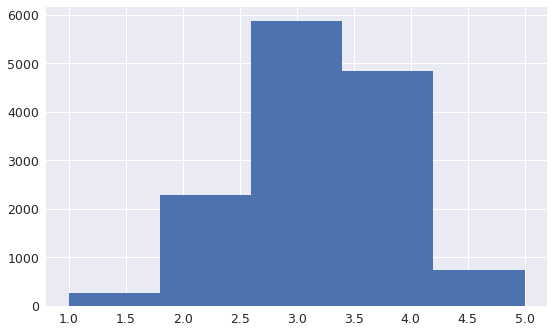

I had an normal distribution for my y_label but I knew I had to upsample my target in order to perform a multiclass classification. 


I also had to pivot much of my data by metric id. This introduced a new problem of missing data my columns in my row. I had each organized by Hospital ID and year. It seems that each hospital did not have data for all the available metrics. There were sometime documentation on why this data was not availble (normally too little samples) but most of the data was missing with no explanation. 

As you can see below there were many features that had very little fill rate. 

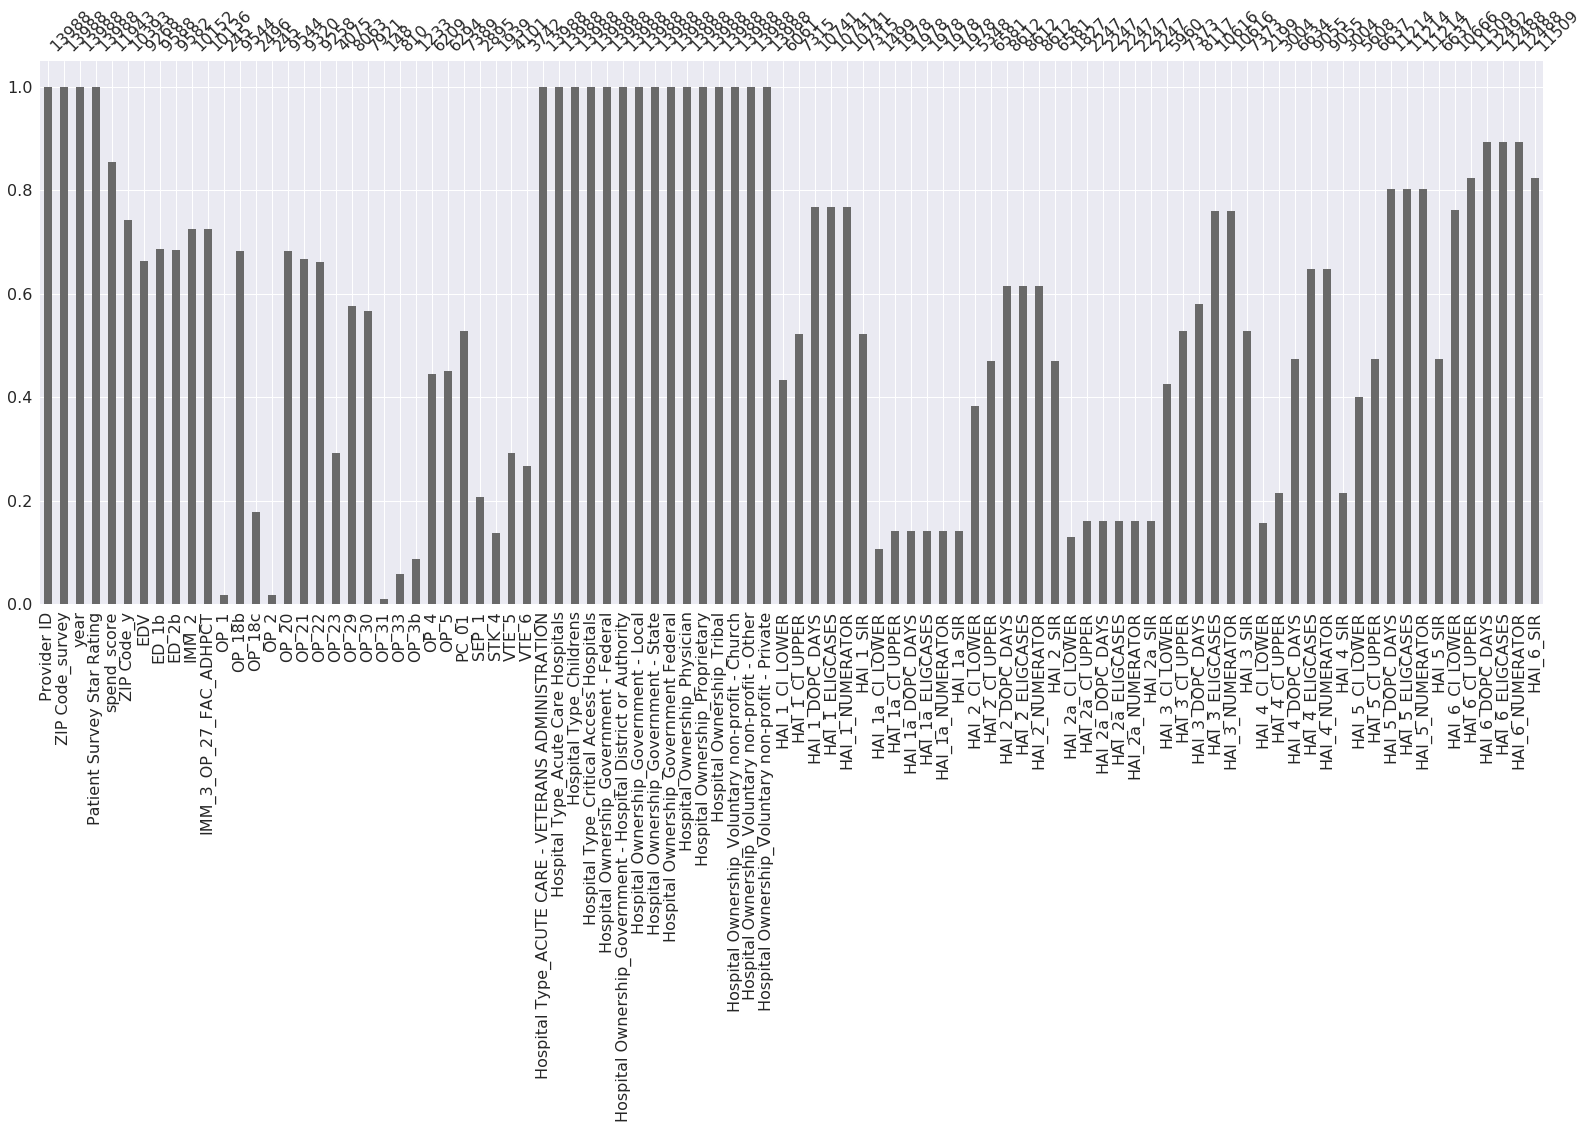

I dropped features that had very little data by hospital. 
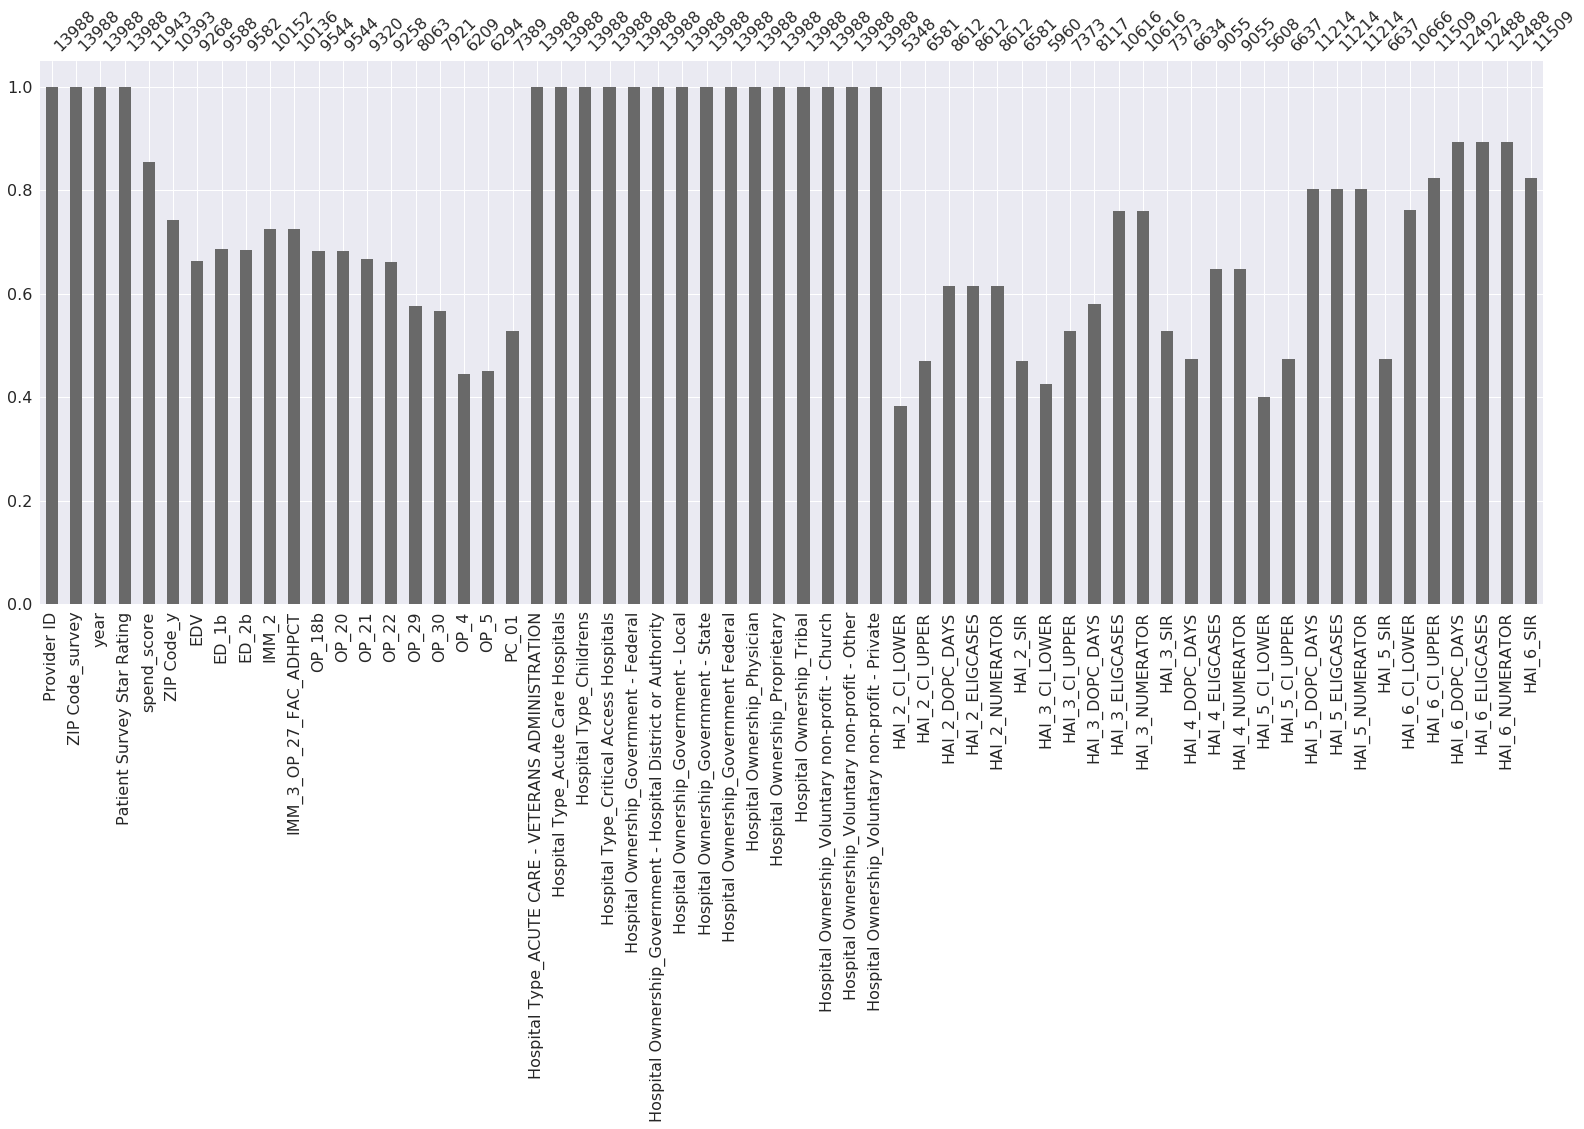

There is obviously still large amounts of missing data. There wasn't any documentation to how the metric was collected to try to find meaning on why the metric was missing. The best way of imputing this data would be specific to each metric. By learing how each metric was calculated there may be a way to impudate the missing values in a statistically sound way. 
Unfortunately there wasn't time to research each metric to find the best way to fill the missing values. So I tried to consider the models that I would be running to replace the values with the most neutral value possible. Since there were no negative numbers in the metrics I filled each value as 0. I didn't want to fill the data with mean as that would reduce the variance of the data too much. 

After filling in the missing data I wanted to see if there was any correlation between my target and my features. 
As you can see below there was very weak corralation between my features and the target.

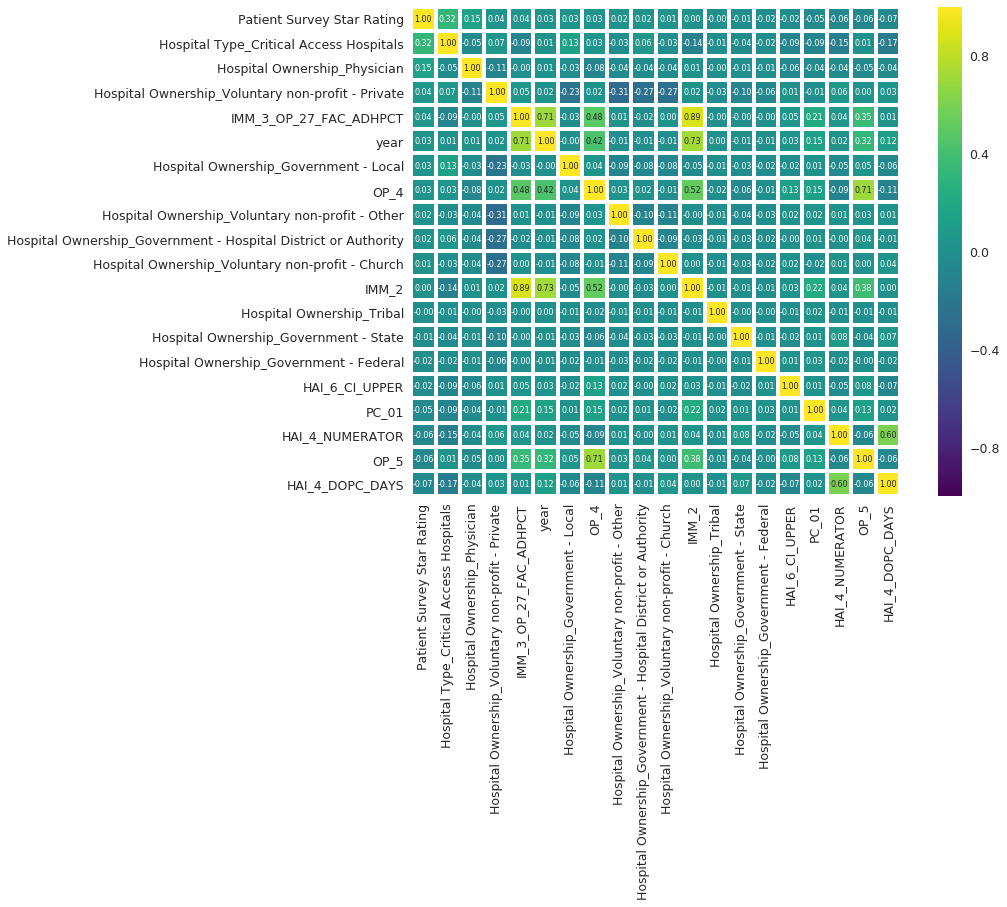

## Modeling

I wanted to try a couple models for the multiclass classification. 
The first thing needed was to upsample my lower classes. I used the SMOTE in iblearn. This was able to balance my classes. 

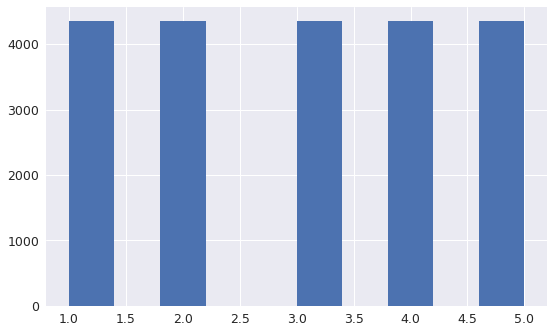

The models I tried were Logistic Regression, Support Vector Classification and Random Forrest. The results did not give a good accuracy score. I had expected this from the EDA above. I didn't think there was a good connection between the way Hospitals quality metrics were created to how Patients rated their care. 
I pulled the coefs from the Logistic Regression which had a test accuracy score of .41


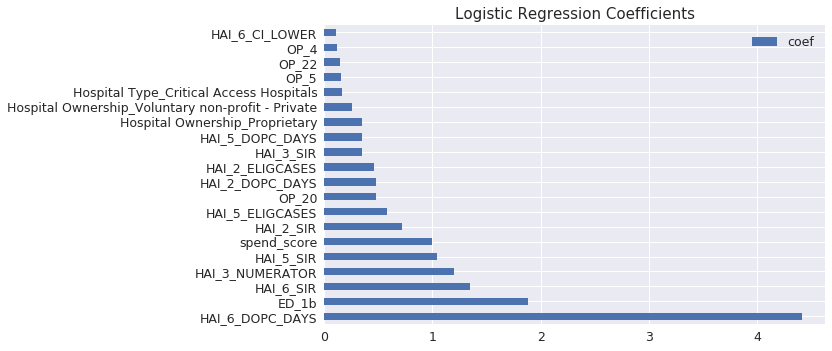